In [57]:
import sys

import polars as pl
import matplotlib.pyplot as plt

work_path = "/home/haselab/Documents/tat/Research/"
sys.path.append(f"{work_path}app/torch_libs/")

from run_manager import RunManager, RunsManager, RunViewer



In [59]:
rv = RunViewer(exp_path="/home/haselab/Documents/tat/Research/app/ee/exp_ens")
rv.write_stats()

df_stats = rv.fetch_stats()
df_stats_ext = df_stats
# df_stats_ext = df_stats.filter((pl.col("run_id").is_in([1, 0, 6, 7, 8])))
df_stats_ext = df_stats.filter((pl.col("num_data") == 2500) & (pl.col("fils") != 48))
# df_stats_ext = df_stats.filter((pl.col("fils") == 1) & (pl.col("num_data") == 10000))
display(df_stats_ext)

run_ids = df_stats_ext["run_id"]
df_mets = rv.fetch_metrics()
df_agg = df_mets.group_by(by="run_id", maintain_order=True).agg(pl.all())
df_agg = df_agg.filter((pl.col("run_id").is_in(run_ids)))

display(df_agg)

run_id,max_lr,epochs,batch_size,ensemble_type,train_trans,val_trans,num_data,iters/epoch,dataset,model_arc,fils,ensembles,params,loss_func,optimizer,scheduler,lr,epoch,train_loss,train_acc,val_loss,val_acc
i64,f64,i64,i64,str,str,str,i64,i64,str,str,i64,i64,i64,str,str,str,f64,i64,f64,f64,f64,f64
56,0.005,2000,125,"""easy""","""[RandomCrop(si…","""[ToTensor(), N…",2500,20,"""cifar10_train""","""models.gitresn…",2,1024,11694080,"""CrossEntropyLo…","""Adam ( Paramet…","""CosineAnnealin…",0.004312,485,0.004151,0.99,0.33758,0.6208
57,0.005,2000,125,"""easy""","""[RandomCrop(si…","""[ToTensor(), N…",2500,20,"""cifar10_train""","""models.gitresn…",4,256,11423232,"""CrossEntropyLo…","""Adam ( Paramet…","""CosineAnnealin…",0.004312,485,0.003856,0.9916,0.416106,0.6026
58,0.005,2000,125,"""easy""","""[RandomCrop(si…","""[ToTensor(), N…",2500,20,"""cifar10_train""","""models.gitresn…",8,64,11289728,"""CrossEntropyLo…","""Adam ( Paramet…","""CosineAnnealin…",0.004312,485,0.002795,0.9924,0.461514,0.6032
59,0.005,2000,125,"""easy""","""[RandomCrop(si…","""[ToTensor(), N…",2500,20,"""cifar10_train""","""models.gitresn…",16,16,11223456,"""CrossEntropyLo…","""Adam ( Paramet…","""CosineAnnealin…",0.004312,485,0.001255,0.998,0.506421,0.592
60,0.005,2000,125,"""easy""","""[RandomCrop(si…","""[ToTensor(), N…",2500,20,"""cifar10_train""","""models.gitresn…",32,4,11190440,"""CrossEntropyLo…","""Adam ( Paramet…","""CosineAnnealin…",0.004312,485,0.001166,0.9984,0.444255,0.6392
62,0.005,2000,125,"""easy""","""[RandomCrop(si…","""[ToTensor(), N…",2500,20,"""cifar10_train""","""models.gitresn…",64,1,11173962,"""CrossEntropyLo…","""Adam ( Paramet…","""CosineAnnealin…",0.004312,485,0.001185,0.9976,0.505118,0.6234


run_id,step,lr,epoch,train_loss,train_acc,val_loss,val_acc
i32,list[i64],list[f64],list[i64],list[f64],list[f64],list[f64],list[f64]
56,"[1, 2, … 485]","[0.005, 0.005, … 0.004312]","[1, 2, … 485]","[0.301283, 0.262008, … 0.004151]","[0.2424, 0.3572, … 0.99]","[0.33691, 0.300297, … 0.33758]","[0.1, 0.2065, … 0.6208]"
57,"[1, 2, … 485]","[0.005, 0.005, … 0.004312]","[1, 2, … 485]","[0.292731, 0.251987, … 0.003856]","[0.2372, 0.358, … 0.9916]","[0.366845, 0.269718, … 0.416106]","[0.1095, 0.302, … 0.6026]"
58,"[1, 2, … 485]","[0.005, 0.005, … 0.004312]","[1, 2, … 485]","[0.290088, 0.25044, … 0.002795]","[0.2396, 0.3496, … 0.9924]","[0.467863, 0.378936, … 0.461514]","[0.1413, 0.2788, … 0.6032]"
59,"[1, 2, … 485]","[0.005, 0.005, … 0.004312]","[1, 2, … 485]","[0.295782, 0.255558, … 0.001255]","[0.2336, 0.3372, … 0.998]","[1.360003, 0.48709, … 0.506421]","[0.1296, 0.1795, … 0.592]"
60,"[1, 2, … 485]","[0.005, 0.005, … 0.004312]","[1, 2, … 485]","[0.317797, 0.26705, … 0.001166]","[0.196, 0.296, … 0.9984]","[2.690643, 0.386863, … 0.444255]","[0.1438, 0.235, … 0.6392]"
62,"[1, 2, … 485]","[0.005, 0.005, … 0.004312]","[1, 2, … 485]","[0.376908, 0.297294, … 0.001185]","[0.1704, 0.246, … 0.9976]","[14.18797, 0.400334, … 0.505118]","[0.1079, 0.2272, … 0.6234]"


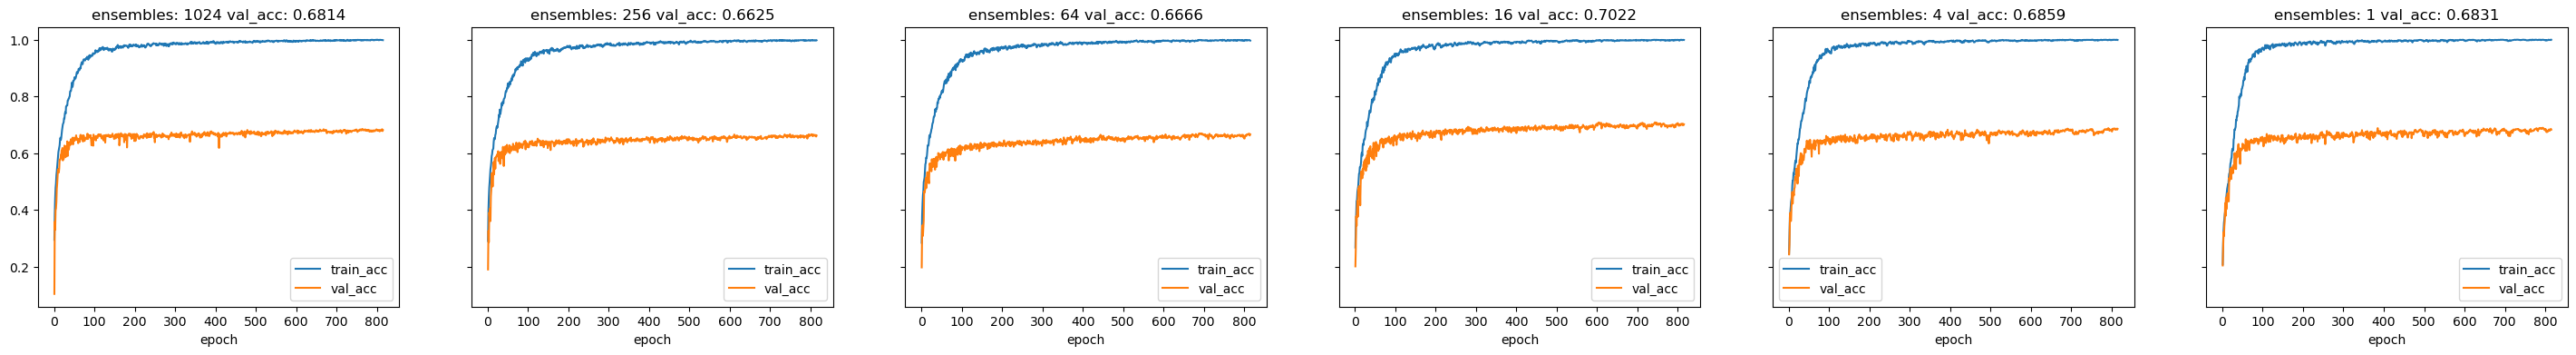

In [54]:
x_col = "epoch"
# y_cols = ["train_loss", "val_loss"]
y_cols = ["train_acc", "val_acc"]
titles = ["ensembles", "val_acc"]


fig, ax = plt.subplots(nrows=1, ncols=len(df_agg), squeeze=False, sharey=True)
plt.subplots_adjust(hspace=0.3)
fig.set_figwidth(6 * len(df_agg))
fig.set_figheight(4 * 1)

for i, df_row in enumerate(df_agg.iter_rows(named=True)):
    ax[0][i].set_xlabel(x_col)
    title_str = ""
    for ti, title in enumerate(titles):
        if ti != 0:
            title_str += " "
        title_str += f'{title}: {df_stats.filter(pl.col("run_id") == df_row["run_id"])[title][0]}'
    ax[0][i].set_title(title_str)
    for y_col in y_cols:
        x = pl.Series(df_row[x_col])
        y = pl.Series(df_row[y_col]).rolling_mean(window_size=1, min_periods=0)
        label = y_col

        ax[0][i].plot(x, y, label=label)
    ax[0][i].legend()






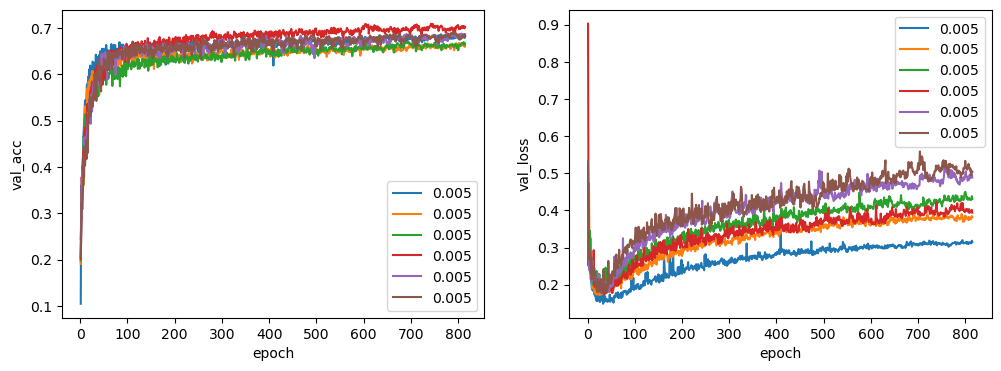

In [56]:
x_col = "epoch"
y_cols = ["val_acc", "val_loss"]
label_col = "max_lr"

fig, ax = plt.subplots(nrows=1, ncols=len(y_cols), squeeze=False, sharey=False)
plt.subplots_adjust(hspace=0.3)
fig.set_figwidth(6 * len(y_cols))
fig.set_figheight(4 * 1)

for i, y_col in enumerate(y_cols):
    ax[0][i].set_xlabel(x_col)
    ax[0][i].set_ylabel(y_col)
    for df_row in df_agg.iter_rows(named=True):
        x = pl.Series(df_row[x_col])
        y = pl.Series(df_row[y_col]).rolling_mean(window_size=1, min_periods=0)
        label = df_stats.filter(pl.col("run_id") == df_row["run_id"])[label_col][0]

        ax[0][i].plot(x, y, label=label)

    ax[0][i].legend()



